This code plots Figure 5 A 

In [1]:
import scanpy as sc
import pandas as pd
import anndata2ri
anndata2ri.activate()
%reload_ext rpy2.ipython

In [2]:
genes_violin = ['Spi1', 'Kit', 'Gata2', 'Myb', 'Hbb-bs', 'Gypa', 'Mllt3', 'Gp5', 'Pf4', 'Mpl', 'Plek']

In [3]:
# Prepare objects

In [4]:
# Atlas

In [5]:
adata_atlas = sc.read('./adata_umap_pca.h5')

In [6]:
# Subset refined populations

vec_red = ((adata_atlas.obs.haem_subclust.str.startswith('BP')) |
           (adata_atlas.obs.haem_subclust.str.startswith('Haem')) |
           (adata_atlas.obs.haem_subclust.str.startswith('Ery')) |
           (adata_atlas.obs.haem_subclust.str.startswith('Mk')) |
           (adata_atlas.obs.haem_subclust.str.startswith('My')))

adata_atlas_red = adata_atlas[vec_red,:].copy()

In [7]:
# Gata1 chimaera

In [8]:
adata_gata = sc.read('adata_gata1_only_r_pocessed.h5')

In [9]:
adata_gata.X = adata_gata.layers['logcounts']

df_ann = pd.read_csv('df_annotation_all_bat.csv',index_col = 0)

adata_gata = adata_gata[df_ann.index,:].copy()

meta_haem = pd.read_csv('PijuanSalaEtAl_SupplementaryTable3_metadata_atlas.txt',sep = '\t',index_col=0)



df_haem = df_ann.copy()

df_haem.index = df_haem['closest.cell']

meta_haem2 = meta_haem.reindex(df_haem.index)

df_haem['pop_haem_ref'] = meta_haem2['haem_subclust']


adata_gata.obs['pop_haem_ref'] = list(df_haem['pop_haem_ref'])

adata_gata.obs['pop_mapped'] = list(df_haem['celltype.mapped'])


/home/mb2338/miniconda3/envs/scvelo2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
list1 = list(adata_gata.obs.tomato)
list2 = [('tdTom-' if entry== 'neg'else 'tdTom+' ) for entry in list1]

adata_gata.obs['tdTom'] = list2


new_col = adata_gata.obs.pop_haem_ref.astype('str') +'_'+ adata_gata.obs.tdTom.astype('str')
adata_gata.obs['comb'] = new_col

In [11]:
# Subset refined populations

adata_gata_red = adata_gata[(adata_gata.obs['pop_mapped'] == 'Endothelium') |
    (adata_gata.obs['pop_mapped'] == 'Haematoendothelial progenitors') |
       (adata_gata.obs['pop_mapped'] == 'Erythroid1') | 
       (adata_gata.obs['pop_mapped'] == 'Erythroid2') |
       (adata_gata.obs['pop_mapped'] == 'Erythroid3') | 
       (adata_gata.obs['pop_mapped'] == 'Blood progenitors 1') |
       (adata_gata.obs['pop_mapped'] == 'Blood progenitors 2'),:].copy()

vec_red = ((adata_gata_red.obs.pop_haem_ref.str.startswith('BP')) |
            (adata_gata_red.obs.pop_haem_ref.str.startswith('Haem')) |
            (adata_gata_red.obs.pop_haem_ref.str.startswith('Ery')) |
            (adata_gata_red.obs.pop_haem_ref.str.startswith('M')) )

adata_gata_red = adata_gata_red[vec_red,:].copy()

In [12]:
# Combine 

adata_whole = adata_atlas_red.concatenate(adata_gata_red)

In [13]:
# Object normalised together

In [14]:
%%R -o adata_big 
adata_big <- readRDS('./norm_big_sce.rds')

In [15]:
adata_big.X = adata_big.layers['logcounts']

In [16]:
list_gata = list(adata_gata_red.obs_names)
list_atlas = list(adata_atlas_red.obs_names)
list_atlas.extend(list_gata)

adata_norm_r = adata_big[list_atlas,:]
adata_norm_r.obs = adata_whole.obs

In [17]:
# Plot Figure 5A

In [18]:
l1 = list(adata_whole.obs['haem_subclust'][:10965])
l2 = list(adata_whole.obs['comb'][10965:])

l1_n = [i +'_atlas' for i in l1]

l1_n.extend(l2)

adata_whole.obs['violin'] = l1_n

order_rid = ['BP1_atlas','BP1_tdTom-', 'BP1_tdTom+',
         'BP2_atlas','BP2_tdTom-', 'BP2_tdTom+',
            'BP3_atlas', 'BP3_tdTom-', 'BP3_tdTom+',
      'BP4_atlas', 'BP4_tdTom-', 'BP4_tdTom+', 
       'Haem1_atlas', 'Haem1_tdTom-', 'Haem1_tdTom+', 
          'Haem2_atlas',   'Haem2_tdTom-', 'Haem2_tdTom+',
      'Haem3_atlas', 'Haem3_tdTom-', 'Haem3_tdTom+', 
           'Haem4_atlas',  'Haem4_tdTom-', 'Haem4_tdTom+',
      'Ery1_atlas', 'Ery1_tdTom-', 'Ery1_tdTom+', 
           'Ery2_atlas',  'Ery2_tdTom-', 'Ery2_tdTom+', 
           'Ery3_atlas',   'Ery3_tdTom-',
         'Ery4_atlas',    'Ery4_tdTom-', 'Ery4_tdTom+',  
            'Mk_atlas', 'Mk_tdTom-', 'Mk_tdTom+',
    'My_atlas'  , 'My_tdTom-', 'My_tdTom+']

... storing 'barcode' as categorical
... storing 'stage' as categorical
... storing 'theiler' as categorical
... storing 'doublet' as categorical
... storing 'stripped' as categorical
... storing 'celltype' as categorical
... storing 'colour' as categorical
... storing 'haem_subclust' as categorical
... storing 'endo_trajectoryName' as categorical
... storing 'endo_gutCluster' as categorical
... storing 'cell_velocyto_loom' as categorical
... storing 'Sample' as categorical
... storing 'Barcode' as categorical
... storing 'Pool' as categorical
... storing 'Sequence' as categorical
... storing 'Sample.name' as categorical
... storing 'CellName' as categorical
... storing 'tomato' as categorical
... storing 'pop_haem_ref' as categorical
... storing 'pop_mapped' as categorical
... storing 'tdTom' as categorical
... storing 'comb' as categorical
... storing 'violin' as categorical


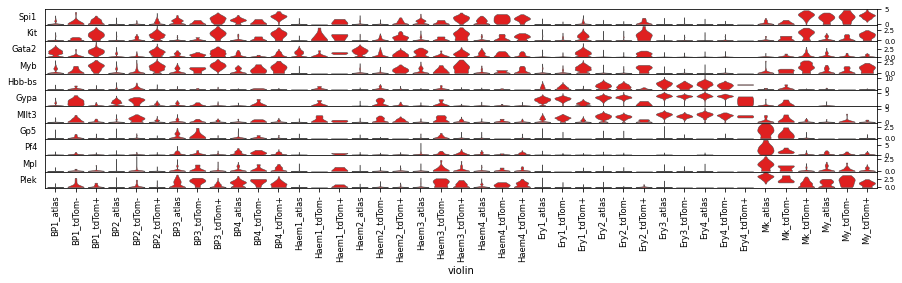

In [19]:
sc.pl.stacked_violin(adata_norm_r, genes_violin, groupby = 'violin', num_categories = 7, rotation = 40, 
                     stripplot = False, jitter = False, size = 1, scale = 'width', order = order_rid, swap_axes = True, row_palette = 'r');